### **HOMEWORK 2**  <h3>

### **Exercício 1**  <h3>
#### **a)** <h4>

Inicialmente temos que ler o DataSet. 

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from scipy.stats import ttest_rel

# Reading the file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

De seguida, é necessário separar os dados em dois grupos: um para as features (variáveis de input) e outro para as classes (variáveis de output).

In [42]:
X = df.drop('class', axis=1) 
y = df['class'] 

De seguida, fizemos stratified cross-validation e inicializámos os classificadores kNN  (k=5) e Naive Bayes.

In [43]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

In [44]:
scores_knn = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
scores_nb = cross_val_score(nb, X, y, cv=cv, scoring='accuracy')

scores_list = [scores_knn, scores_nb]

Fizemos os boxplots com as fold accuracies para os dois classificadores.

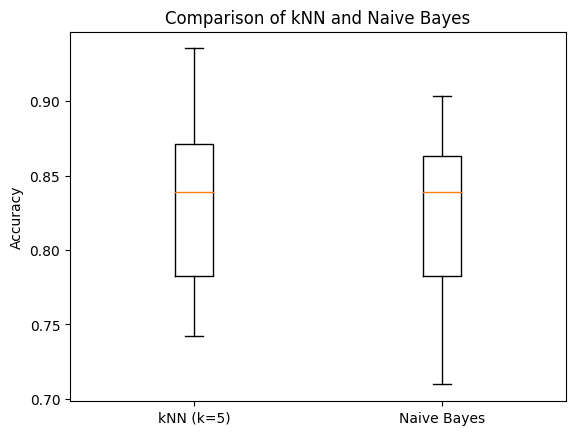

In [45]:
fig, ax = plt.subplots()

ax.boxplot(scores_list)
ax.set_xticklabels(['kNN (k=5)', 'Naive Bayes'])
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of kNN and Naive Bayes')
plt.show()

#### **b)** <h4>

Utilizámos o t-test para testar a hipótese de que kNN é estatisticamente superior a Naive Bayes relativamente à accuracy.

In [46]:
t_stat, p_value = ttest_rel(scores_knn, scores_nb, alternative='greater')

print('t-statistic:', t_stat)
print('p-value:', p_value)


t-statistic: 0.9214426752509264
p-value: 0.19042809062064092


Dado que o p-value é maior que 0.05, concluímos que a hipótese não é verdadeira.

### **Exercício 2**  <h3>

Inicializámos os classificadores kNN para k=1 e k=5.

In [47]:
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

Criámos as matrizes de confusão para os dois classificadores.

In [48]:
cm1_total = np.zeros((3, 3))
cm5_total = np.zeros((3, 3))

Para cada uma das 10 folds obtivemos os X e y de treino e teste, assim como os y de teste previstos. Calculámos as matrizes de confusão para os dois classificadores e somámos às matrizes de confusão globais.

In [49]:
for train_k, test_k in cv.split(X, y):
    # Obter os X e y de teste e treino  
    X_train, X_test = X.iloc[train_k], X.iloc[test_k]
    y_train, y_test = y.iloc[train_k], y.iloc[test_k]

    # Obter os y previstos para o knn1 e knn5
    knn1.fit(X_train, y_train)
    knn5.fit(X_train, y_train)
    y1_pred = knn1.predict(X_test)
    y5_pred = knn5.predict(X_test)

    # Obter as matrizes de confusão
    cm1 = confusion_matrix(y_test, y1_pred)
    cm5 = confusion_matrix(y_test, y5_pred)

    # Adicionar às matrizes cumulativas
    cm1_total += cm1
    cm5_total += cm5

Fizemos a diferença entre as matrizes de confusão.

In [50]:
dif = cm1_total - cm5_total

Fizémos o gráfico.

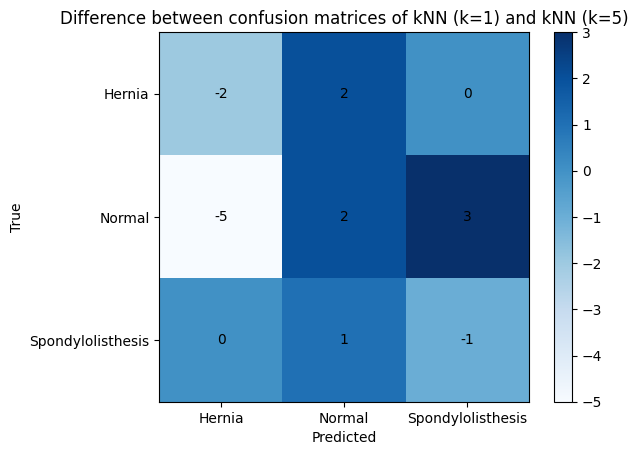

In [51]:
plt.figure()
plt.imshow(dif, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(dif.shape[0]):
    for j in range(dif.shape[1]):
        plt.text(j, i, str(int(dif[i, j])), ha='center', va='center', color='black')
plt.xticks([0, 1, 2], ['Hernia', 'Normal', 'Spondylolisthesis'])
plt.yticks([0, 1, 2], ['Hernia', 'Normal', 'Spondylolisthesis'])
plt.title('Difference between confusion matrices of kNN (k=1) and kNN (k=5)')
plt.show()

Na diagonal, um valor igual a zero implica que ambos os classificadores tiveram o mesmo número de classificações corretas nessas classes. Se o valor for positivo, o kNN com k=1 teve um maior número de classificações corretas e se o valor for negativo, o kNN com k=5 teve um maior número de classificações corretas. Para os valores fora da diagonal, se estes forem positivos, implica um maior erro na classificação do kNN (k=1) e se forem negativos, implica um maior erro de classificação do kNN (k=5). Assim, analisando a diagonal da matriz, verificamos que o kNN com k=1 funciona melhor para a classe 'Normal' e 'Spondylolisthesis', enquanto que o kNN com k=5 é melhor para a classe 'Hernia'.

### **Exercício 3**  <h3>